# MNIST - Blocks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('train.csv', delimiter=',',skip_header=1)
data.shape

(42000, 785)

In [3]:
# normalize X
X = data[:,1:]/255
# one hot encode y
y = np.zeros(shape=(len(X),10),dtype=int)
y[np.arange(len(data)),data[:,0].astype(int)] = 1

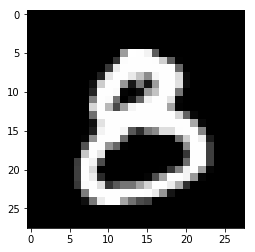

(8, array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))

In [4]:
# sample image
i = np.random.randint(len(X))
plt.imshow(X[i].reshape(28,28),cmap='gray')
plt.show()
np.argmax(y[i]),y[i]

In [5]:
# train/test split
mask = np.zeros(shape=len(X),dtype=bool)
mask[np.random.choice(np.arange(len(X)),size=int(0.8*len(X)),replace=False)] = 1
X_train = X[mask]
X_test = X[~mask]
y_train = y[mask]
y_test = y[~mask]

## CNN models

In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout
import blocks

Using TensorFlow backend.


### VGG block

In [7]:
input_layer = Input(shape=(28,28,1))
x = blocks.vgg(input_layer,32,3)
hidden = Dense(128,activation='relu')(Flatten()(x))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)  

In [8]:
model.fit(X_train.reshape(-1,28,28,1),y_train,epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
33600/33600 [==============================] - 212s 6ms/step - loss: 0.0414 - acc: 0.9861


### ResNet block

In [9]:
input_layer = Input(shape=(28,28,1))
x = blocks.residual(input_layer,32)
hidden = Dense(128,activation='relu')(Flatten()(x))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 28, 28, 32)   9248        conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 32)   64          input_2[0][0]                    
__________________________________________________________________________________________________
add_1 (Add

In [10]:
model.fit(X_train.reshape(-1,28,28,1),y_train,epochs=1)

Epoch 1/1
33600/33600 [==============================] - 188s 6ms/step - loss: 0.0438 - acc: 0.9851


### Inception block

In [11]:
input_layer = Input(shape=(28,28,1))
x = blocks.inception(input_layer,32,32,32,32,32,32)
hidden = Dense(128,activation='relu')(Flatten()(x))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 32)   64          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 32)   64          input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 28, 28, 1)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (

In [12]:
model.fit(X_train.reshape(-1,28,28,1),y_train,epochs=1)

Epoch 1/1
33600/33600 [==============================] - 505s 15ms/step - loss: 0.0468 - acc: 0.9841
